<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/competitions/digit-recognizer/data">Digit Recognizer</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/digitRecognizer.png" width="256"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/scoreMNIST.png" width="1024">
</div>



<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/683/mnist+database+of+handwritten+digits">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [5]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [7]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

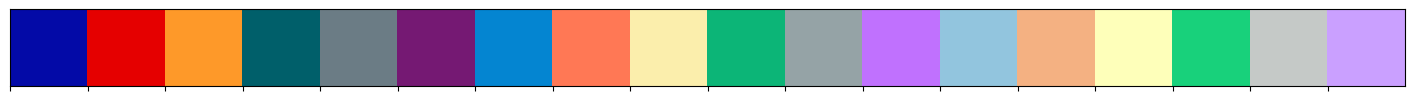

In [8]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [9]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram, affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [10]:
projet = initProjet(repertoireRacine='.',nomProjet='ReconnaissanceManuscriteDesChiffres-K-Means-KNN')

In [11]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [12]:
def afficheDigits(donnees,simg):
    plt.figure(1, figsize=(8, 8))
    plt.clf()
    plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
    for i in range(36):
        plt.subplot(6, 6, i + 1)
        plt.imshow(donnees.iloc[i,:].values.reshape((simg, simg)), cmap=plt.cm.gray, vmax=16, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

In [13]:
def afficheACP(pca):
    nombreDim = sum(pca.explained_variance_ratio_.cumsum() < .95) + 1
    
    plt.figure(figsize=(14,12))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    
    plt.axvline(nombreDim, 0, 1, linewidth=1, ls='--', color='r');
    plt.axhline(0.95, 0, 1, linewidth=1, ls='--', color='r');
    
    plt.xlabel('nombre de dimensions')
    plt.ylabel('Variance expliquée')
    print('Composants =',sum(pca.explained_variance_ratio_.cumsum()*100 < 95 ) + 1 )

In [14]:
def calculKMensDonnees(donnees, label, clusters = 50):
    t0 = time.time()
    donneesK = pd.DataFrame()
    for i in range(10):
        d = donnees[label == i]

        kmeans = KMeans(n_clusters=clusters)
        kmeans.fit(d)
        df = pd.DataFrame(kmeans.cluster_centers_)
        df['label'] = i
        if i == 0 :
            donneesK = df.copy()
        else :
            donneesK = pd.concat([donneesK,df])       
    t1 = time.time()
    print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
    return donneesK

In [15]:
def calculKNNDonnees(X_train, X_test, y_train, y_test, voisins = 1):
    t0 = time.time()

    clf = KNeighborsClassifier(voisins)
    clf.fit(X_train, y_train)

    Z = pd.DataFrame(clf.predict(X_test),columns=["predict"])
    Z["label"] = y_test
    t1 = time.time()
    print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
    return Z

In [16]:
def affichePrecissionModel(p):
    # print(round((p.predict==p.label).sum() * 100 / p.label.count(),2))
    print(accuracy_score(p.predict,p.label)*100)
    # print(accuracy_score(p.predict,p.label, normalize=False), p.label.count(), 
    #       accuracy_score(p.predict,p.label, normalize=False)*100/ p.label.count())    
    print('--'*30)
    return pd.crosstab(p.predict,p.label)

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

In [17]:
t0 = time.time()        
donnees=pd.read_csv("../donnees/train.csv")#,nrows=1000)
t1 = time.time()        
print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
donnees.head()

Exécution  :1.08s


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Centrage et réduction des données</div></b>
<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/moyenne.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/ecart_type.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/centrage_reduction.png"></th>
</tr>
</table>

Composants = 320
Exécution  :1.41s


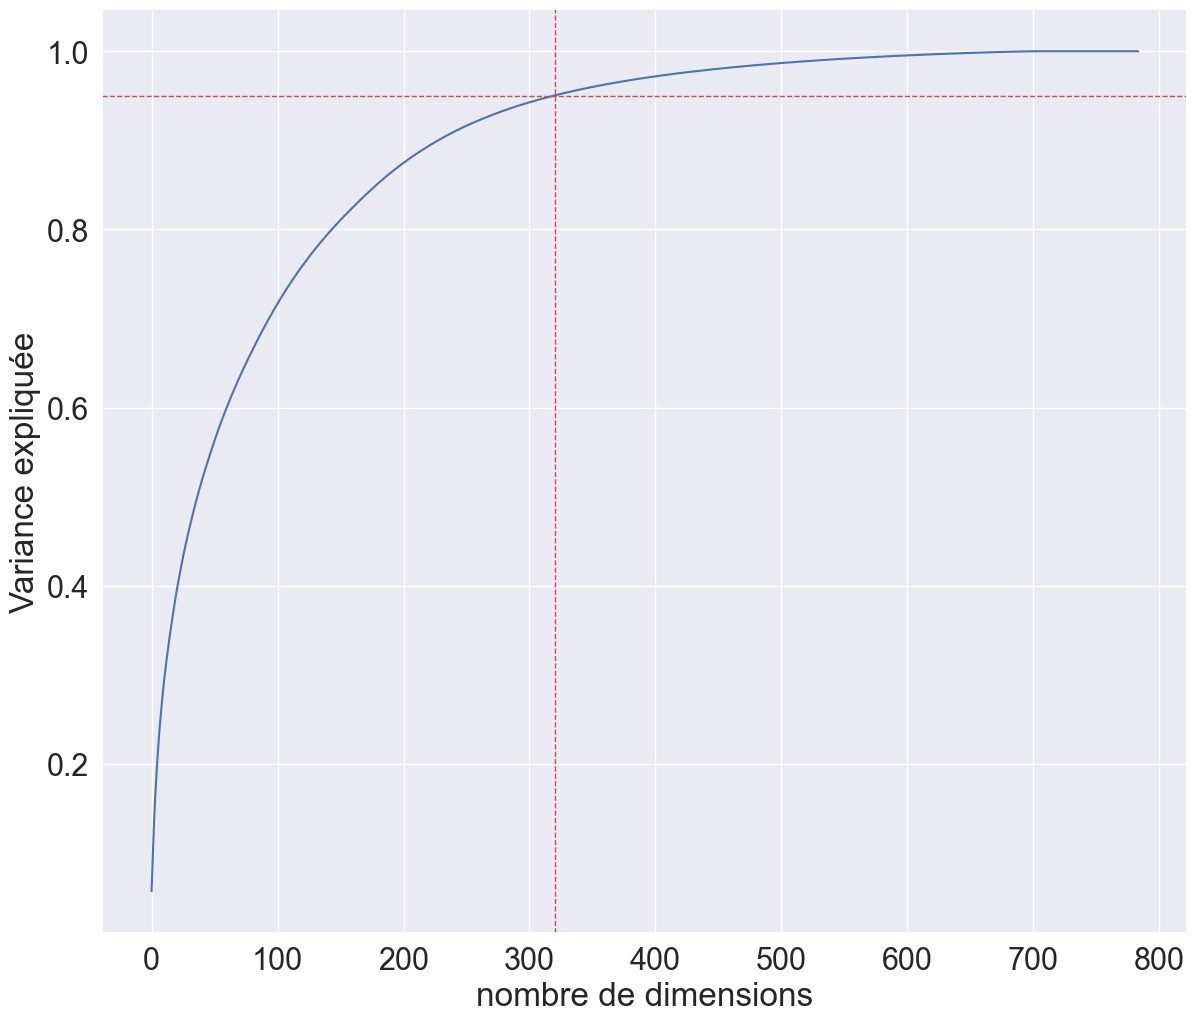

In [14]:
t0 = time.time()       
pca = PCA().fit(StandardScaler().fit_transform(donnees.drop(columns='label')))
afficheACP(pca)

print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Min Max Scaller</div></b>

Composants = 154
Exécution  :1.23s


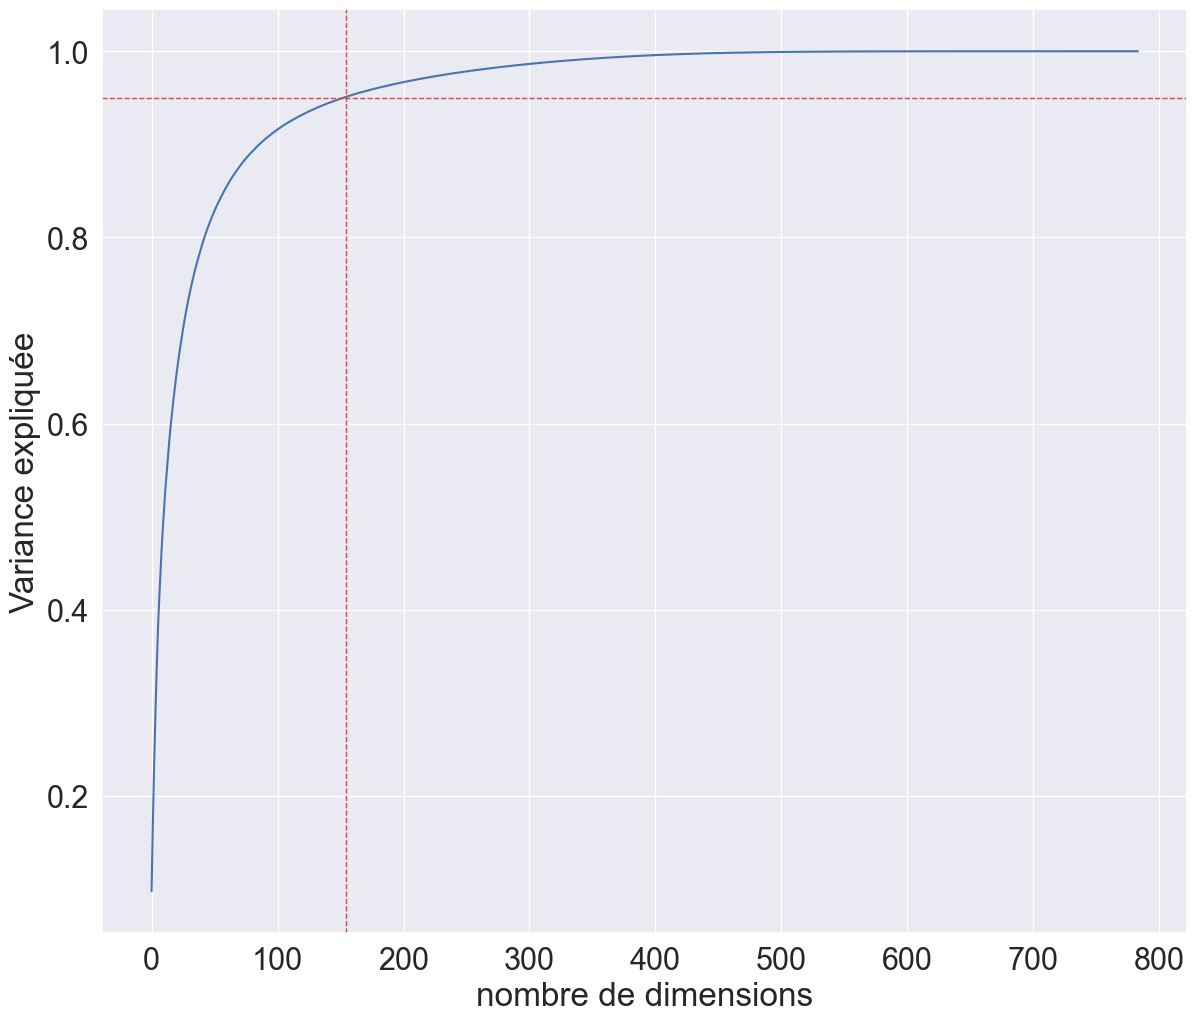

In [15]:
t0 = time.time()        
pca = PCA().fit(MinMaxScaler().fit_transform(donnees.drop(columns='label')))
afficheACP(pca)

print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

Composants = 154
Exécution  :.87s


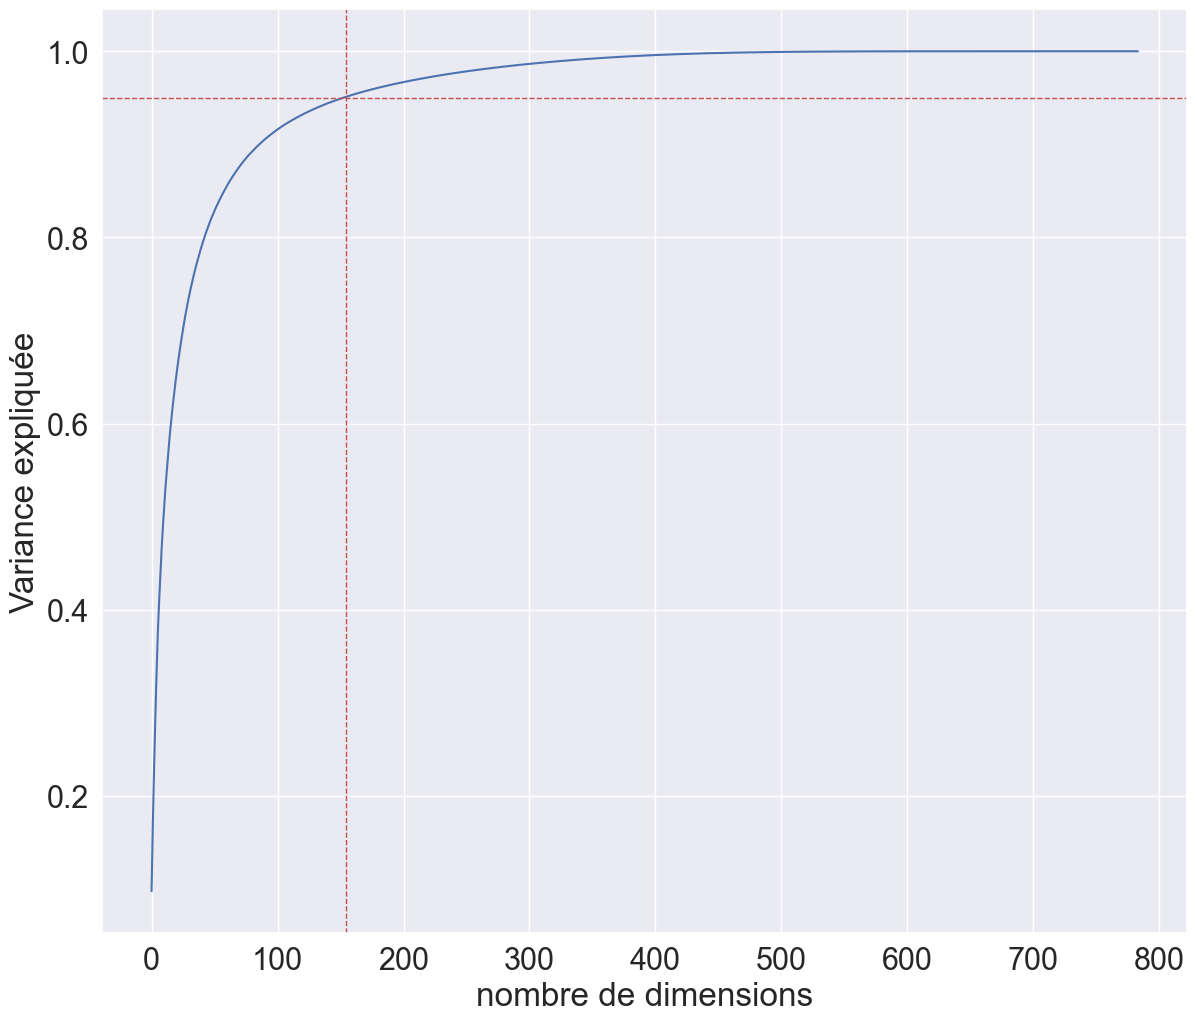

In [16]:
t0 = time.time()        
pca = PCA().fit(donnees.drop(columns='label'))
afficheACP(pca)

print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Analyse en composantes principales</div></b>

<table>
<tr>
<th><div style='padding:15px;color:#030aa7;font-size:120%;text-align: center;font-family: Georgia, serif'>Quelle est la meilleure représentation simplifiée ?</div></th>
<th><div style='padding:15px;color:#030aa7;font-size:120%;text-align: center;font-family: Georgia, serif'>Recherche du meilleur axe de projection</div></th>
</tr>    
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/acp_analogie_photo.png" width="512"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/acp_projection_axe.png" width="512"></th>
</tr>
</table>    
<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left;font-family: Georgia, serif'>A l'évidence, c'est la vue de profil. La raison est que l'image projetée du chameau dans ce plan est plus proche de l'image initiale dans le sens ou la variance des points servant à sa représentation est plus grande et donc restitue mieux la variance des points d'origine.</div>
<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/axe_variance_max.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/max_dist.png"></th>
</tr>
</table>

In [17]:
t0 = time.time()        
ndim = 169
pca = PCA(ndim).set_output(transform="pandas")
donneesP = pca.fit_transform(donnees.drop(columns='label'))
t1 = time.time()        
print(('Exécution  : %.2fs' % (t1 - t0)).lstrip('0'))

Exécution  : 1.08s


In [18]:
donneesP.sample(5)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca159,pca160,pca161,pca162,pca163,pca164,pca165,pca166,pca167,pca168
37278,117.369149,-798.632236,-268.210553,-344.485684,67.683530,-603.141191,-184.885997,180.186603,88.673006,-364.337897,...,-17.817976,27.019172,-29.012163,-7.919710,18.392707,-0.931624,20.377401,-34.922206,30.834387,-50.017171
36151,-61.847198,-567.878110,-71.621304,475.178243,-320.510620,-39.285013,-226.829233,-488.608071,270.212500,471.826224,...,3.433699,-2.538280,-2.183046,-21.221883,-1.773407,39.467602,8.040345,3.385481,56.090420,10.629518
26225,357.362694,137.738711,252.007621,443.220752,276.374077,-612.664532,261.448387,492.516851,-1011.817330,-111.984822,...,13.581803,29.328002,-34.734680,-11.701513,71.218838,14.618223,-7.506535,0.875214,-72.405084,23.712768
1546,610.233796,324.530519,387.046489,664.926565,911.900182,116.133188,364.794094,-309.841368,639.688624,243.530098,...,42.008201,9.287413,62.333491,16.153667,52.421297,26.256061,5.927506,23.112395,34.541304,-31.100608
32798,237.851116,-414.962564,439.236139,572.767292,172.963628,242.197124,-403.597575,-503.538162,37.586107,384.125429,...,-38.628205,-19.735663,20.498677,26.713004,-30.408131,-6.476491,38.897171,22.934739,-3.354005,13.687689


In [19]:
label = donnees.label
donneesR = donnees.drop(columns='label').copy()

In [20]:
donneesR.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(donneesR.shape)
print(donneesP.shape)

(42000, 784)
(42000, 169)


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Représentation des images initiales</div></b>

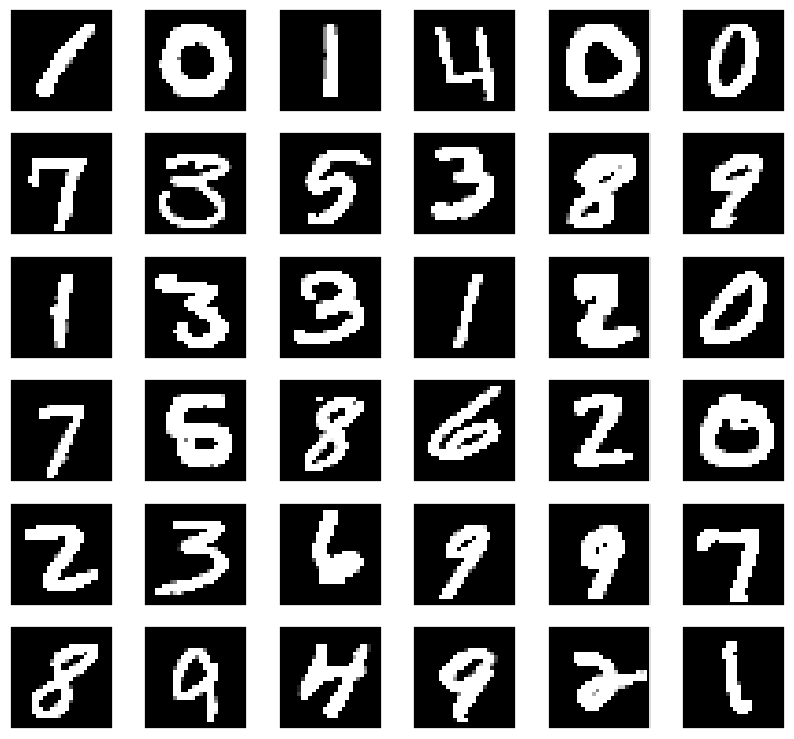

In [22]:
afficheDigits(donneesR,28)

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Représentation des images après l’analyse en composante principale</div></b>

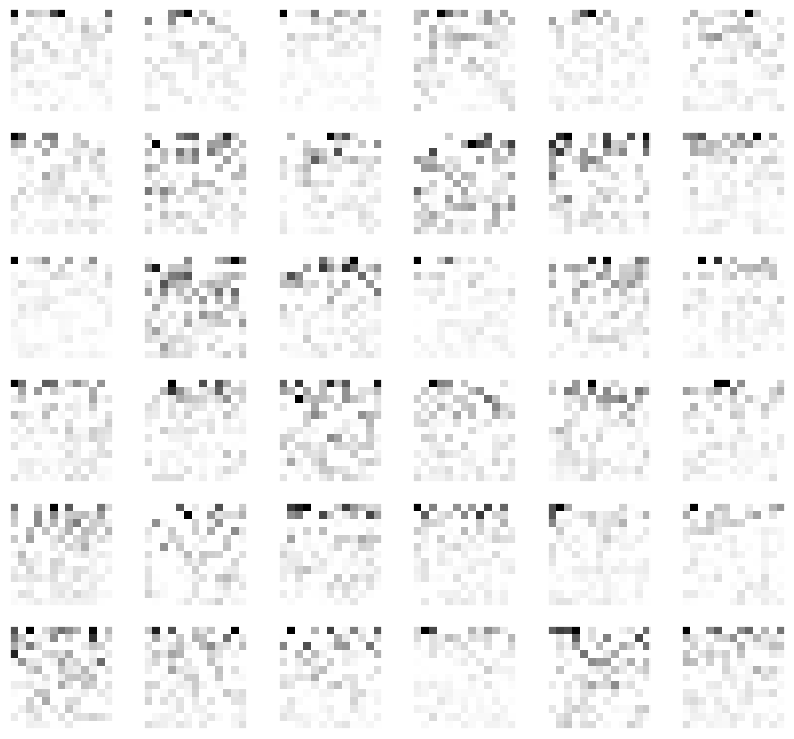

In [23]:
afficheDigits(donneesP,13)

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Clustering pour la diminution de la taille du jeu de  données</div></b> 

<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/MNIST_resume.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/MNIST_kmeans.png"></th>
</tr>
</table>

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>KMeans 50</div></b> 

In [24]:
kmeans = KMeans(n_clusters=50)

In [25]:
val = 0 
kmeans.fit(donnees[donnees.label == val].drop(columns='label'))
donneesKM0 = pd.DataFrame(kmeans.cluster_centers_)
donneesKM0['label'] = val

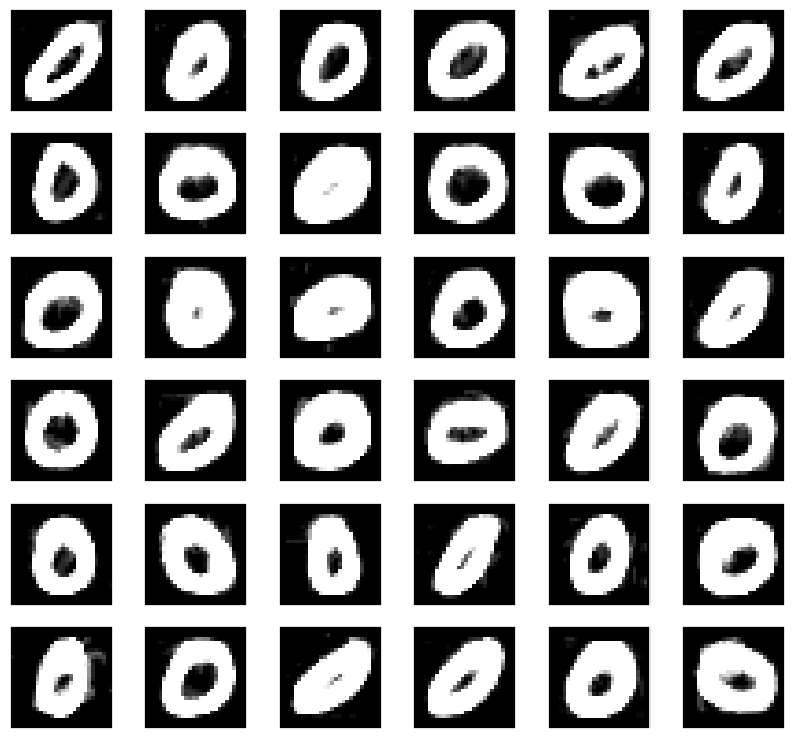

In [26]:
afficheDigits(donneesKM0.drop(columns='label'),28)

In [27]:
val = 6
kmeans.fit(donnees[donnees.label == val].drop(columns='label'))
donneesKM0 = pd.DataFrame(kmeans.cluster_centers_)
donneesKM0['label'] = val

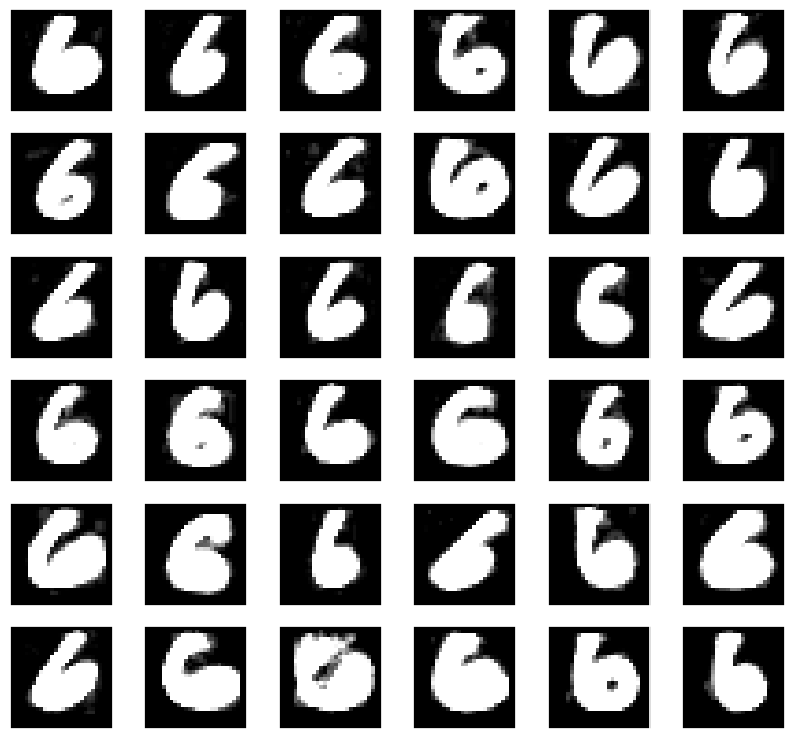

In [28]:
afficheDigits(donneesKM0.drop(columns='label'),28)

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Création des jeux de données constituées des centroids</div></b> 

In [29]:
donneesP50  = calculKMensDonnees(donneesP, label,50)
donneesR50  = calculKMensDonnees(donneesR, label,50)
donneesP100 = calculKMensDonnees(donneesP, label,100)
donneesR100 = calculKMensDonnees(donneesR, label,100)
donneesP150 = calculKMensDonnees(donneesP, label,150)
donneesR150 = calculKMensDonnees(donneesR, label,150)

Exécution  :1.42s
Exécution  :4.93s
Exécution  :2.23s
Exécution  :7.59s
Exécution  :3.14s
Exécution  :8.24s


In [30]:
donneesR50.shape,donneesP50.shape,donneesR100.shape,donneesP100.shape,donneesR150.shape,donneesP150.shape

((500, 785), (500, 170), (1000, 785), (1000, 170), (1500, 785), (1500, 170))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Inférence sur les données initiales</div></b> 

In [31]:
clf = KNeighborsClassifier(1)
clf.fit(donneesP50.iloc[:,:169], donneesP50.label)
Z = pd.DataFrame(clf.predict(donneesP),columns=["predict"])
Z["label"] = label    
Z.sample(5)    

,predict,label
40433,4,4
31405,0,0
18090,2,2
24590,3,3
27843,1,1


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Matrice de confusion</div></b> 
<table>
    <tr>                                                                                   
         <th><b><div style='padding:15px;color:#030aa7;font-size:200%;text-align: center'></div></b></th>
         <th><b><div style='padding:15px;color:#030aa7;font-size:200%;text-align: center'>Matrice de confusion</div></b></th>
    </tr>
    <tr>                                                                                   
         <th>
                 <img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/metriques/donnees_classif.png" width="512">
             </th>
             <th>
                 <img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/metriques/matrice_confusion.png">
         </th>
    </tr>
</table>    

In [32]:
pd.crosstab(Z.predict,Z.label).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4073,0,20,3,3,6,13,2,12,8
1,0,4640,23,11,24,3,6,31,20,7
2,12,9,4028,43,5,4,4,28,12,9
3,3,2,18,4086,0,61,0,3,57,22
4,3,8,3,1,3859,6,4,31,14,99
5,7,1,3,86,2,3626,22,1,64,14
6,22,8,4,2,22,33,4078,0,16,2
7,4,9,36,19,10,9,2,4201,10,81
8,3,3,35,68,6,26,8,1,3836,12


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Taux de réussite du modèle</div></b> 

In [33]:
sum(Z.predict == Z.label)*100 / Z.count()[0]

96.09761904761905

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Inférence des  tous les modèles</div></b> 

In [34]:
predP50 = calculKNNDonnees(donneesP50.iloc[:,:169],donneesP,donneesP50.label,label)
predR50 = calculKNNDonnees(donneesR50.iloc[:,:784],donneesR,donneesR50.label,label)
predP100 = calculKNNDonnees(donneesP100.iloc[:,:169],donneesP,donneesP100.label,label)
predR100 = calculKNNDonnees(donneesR100.iloc[:,:784],donneesR,donneesR100.label,label)
predP150 = calculKNNDonnees(donneesP150.iloc[:,:169],donneesP,donneesP150.label,label)
predR150 = calculKNNDonnees(donneesR150.iloc[:,:784],donneesR,donneesR150.label,label)

Exécution  :2.56s
Exécution  :3.05s
Exécution  :2.75s
Exécution  :4.07s
Exécution  :2.63s
Exécution  :3.81s


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Résultats données sans transformation  50 classes</div></b> 

In [35]:
affichePrecissionModel(predR50).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

96.21666666666667
------------------------------------------------------------


label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4082,1,18,4,4,11,24,3,8,12
1,1,4645,18,12,25,5,4,36,17,6
2,12,11,4034,35,1,3,3,27,14,6
3,4,2,26,4106,0,53,0,2,38,33
4,3,10,3,4,3869,4,4,30,16,97
5,8,1,1,80,1,3649,23,1,74,13
6,18,4,3,3,24,26,4066,0,15,2
7,0,3,34,19,11,3,1,4190,7,72
8,1,3,31,59,7,21,12,2,3847,24


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Résultats données avec ACP 50 classes</div></b> 

In [36]:
affichePrecissionModel(predP50).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

96.09761904761905
------------------------------------------------------------


label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4073,0,20,3,3,6,13,2,12,8
1,0,4640,23,11,24,3,6,31,20,7
2,12,9,4028,43,5,4,4,28,12,9
3,3,2,18,4086,0,61,0,3,57,22
4,3,8,3,1,3859,6,4,31,14,99
5,7,1,3,86,2,3626,22,1,64,14
6,22,8,4,2,22,33,4078,0,16,2
7,4,9,36,19,10,9,2,4201,10,81
8,3,3,35,68,6,26,8,1,3836,12


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Résultats données sans transformation 100 classes</div></b> 

In [37]:
affichePrecissionModel(predR100).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

97.37380952380953
------------------------------------------------------------


label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4089,0,16,1,3,5,7,2,6,5
1,0,4666,21,6,18,3,4,25,13,5
2,6,4,4050,28,0,2,2,23,9,5
3,0,1,12,4169,0,36,0,1,27,12
4,2,1,2,1,3922,3,5,16,8,56
5,6,0,2,63,1,3701,15,1,35,10
6,18,2,4,1,11,16,4095,1,10,2
7,0,5,33,17,5,4,0,4243,7,50
8,3,2,26,43,1,11,9,0,3933,14


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Résultats données avec ACP 100 classes</div></b> 

In [38]:
affichePrecissionModel(predP100).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

97.37142857142858
------------------------------------------------------------


label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4090,0,9,1,4,7,6,0,5,11
1,0,4662,20,11,22,6,5,28,14,7
2,7,2,4078,22,0,2,4,20,8,4
3,0,2,10,4180,0,27,1,1,34,21
4,3,1,2,1,3913,0,5,11,10,55
5,6,0,2,57,2,3696,11,2,46,12
6,20,2,2,2,12,21,4099,0,9,1
7,0,8,28,10,8,4,0,4267,6,66
8,1,3,20,44,1,17,6,0,3910,10


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Résultats données sans transformation 150 classes</div></b> 

In [39]:
affichePrecissionModel(predR150).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

97.94761904761906
------------------------------------------------------------


label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4104,0,12,4,4,5,9,1,6,8
1,0,4670,21,4,17,3,3,28,14,3
2,4,2,4079,23,0,1,2,23,8,3
3,1,0,9,4205,0,24,0,2,20,12
4,2,0,1,1,3964,1,3,9,6,49
5,2,1,1,52,1,3714,9,0,30,6
6,12,3,3,2,8,19,4107,0,11,1
7,0,3,26,16,3,2,0,4293,5,45
8,1,2,19,31,1,11,4,1,3951,10


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Résultats données avec ACP 150 classes</div></b> 

In [40]:
affichePrecissionModel(predP150).style.format("{:d}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

97.93571428571428
------------------------------------------------------------


label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4101,0,16,2,2,4,11,2,5,7
1,0,4674,17,3,24,2,3,23,18,6
2,4,1,4079,14,1,2,4,17,7,3
3,2,1,8,4217,0,25,0,0,25,11
4,0,1,3,1,3946,2,5,9,8,43
5,5,0,2,52,0,3715,10,0,31,10
6,15,2,1,2,9,20,4100,0,7,2
7,2,2,26,11,4,3,0,4297,5,44
8,1,0,19,32,3,8,4,0,3945,3
